# Recommender Dataset

In this analysis, we use the MovieLens dataset, as described in Harper and Konstan (2015). It consists of:
- 100,000 ratings (1-5) from 943 users on 1682 movies

- Each user has rated at least 20 movies

- Simple demographic info for the users (age, gender, occupation, zip)

## Review of the files

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Ratings (u.data)
Information about which user rated which movie with what rating.

In [5]:
ratings_df = pd.read_csv('data/ml-100k/u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp'])
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit='s')

In [6]:
ratings_df.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16


In [7]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   user_id    100000 non-null  int64         
 1   movie_id   100000 non-null  int64         
 2   rating     100000 non-null  int64         
 3   timestamp  100000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 3.1 MB


There are no missing values for the ratings.

### Movies: (u.item)
Extensive information about each movie.

In [8]:
movie_columns = ['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action',
                 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
                 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies_df = pd.read_csv('data/ml-100k/u.item', sep='|', names=movie_columns, encoding='latin-1')

In [9]:
movies_df.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   movie_title         1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   IMDb_URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

**video_release_date** seems to be completely missing, so we can immediately drop the feature.

Two values for **ImDb_URL** are missing. This is not a problem since the feature does not have any value for the prediction and we will drop it later.

One value for **release_date** is missing.


In [11]:
movies_df[movies_df['release_date'].isna()]

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
266,267,unknown,NaN,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
ratings_df[ratings_df['movie_id'] == 267]

,user_id,movie_id,rating,timestamp
2172,130,267,5,1997-10-02 14:07:19
3781,5,267,4,1997-09-30 15:57:44
7245,268,267,3,1997-10-01 21:41:17
12475,297,267,3,1997-09-28 01:12:19
14756,319,267,4,1997-10-01 12:08:10
15292,1,267,4,1997-10-01 08:02:35
49295,532,267,3,1997-09-28 10:09:08
93523,833,267,1,1997-09-30 21:41:09
99723,422,267,4,1997-09-30 21:46:26


In [13]:
movies_df = movies_df[movies_df['movie_id'] != 267]
ratings_df = ratings_df[ratings_df['movie_id'] != 267]

Since there is absolutely no information about the movie 267, we just manually drop it and the 9 corresponding ratings.

### Users (u.user)
Demographic information about each user.

In [14]:
users_df = pd.read_csv('data/ml-100k/u.user', sep='|', names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])

In [15]:
users_df.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [16]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


There are no missing values for the users.

## Exploratory Data Analysis (EDA)

### Distribution of Ratings

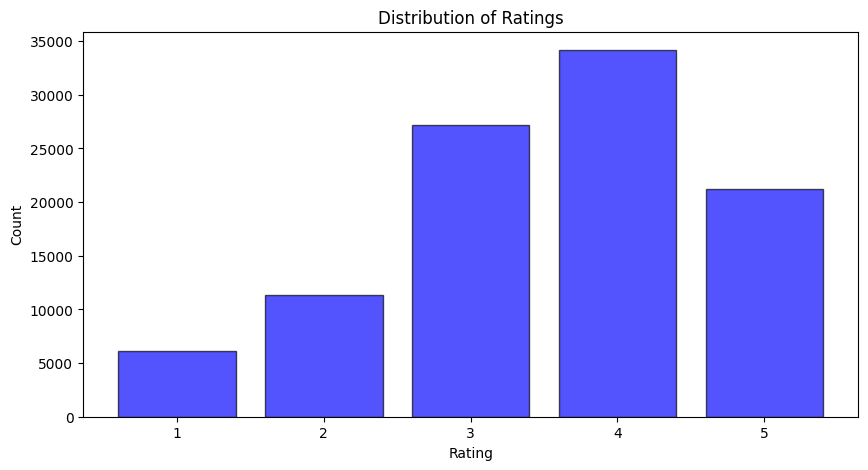

In [17]:
plt.figure(figsize=(10, 5))
ratings_count = ratings_df['rating'].value_counts().sort_index()
plt.bar(ratings_count.index, ratings_count.values, color='blue', alpha=0.67, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

### Number of Ratings per User

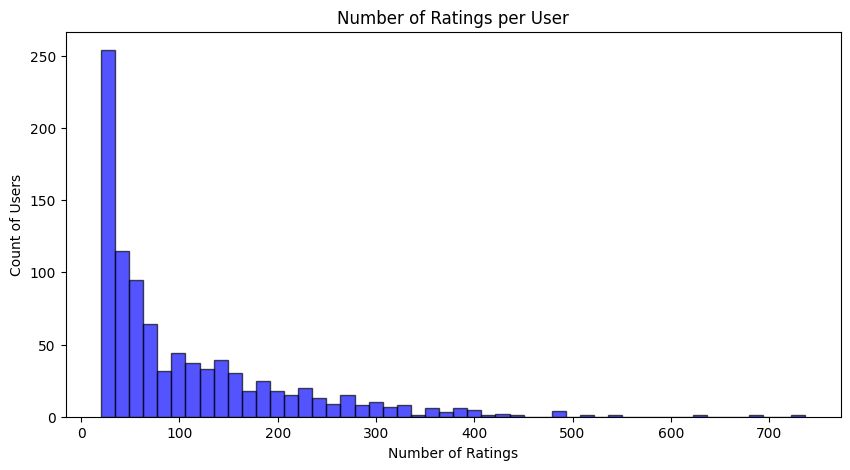

In [18]:
plt.figure(figsize=(10, 5))
plt.hist(ratings_df['user_id'].value_counts(), bins=50, color='blue', alpha=0.67, edgecolor='black')
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Users')
plt.show()

### Number of Ratings per Movie

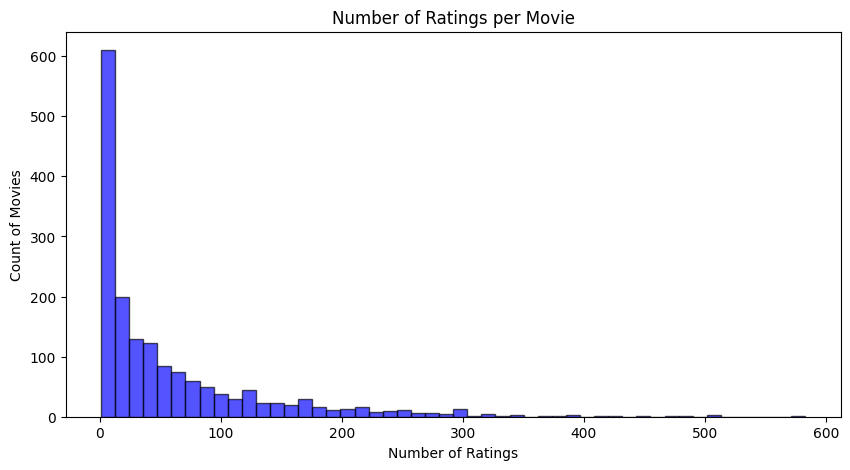

In [19]:
plt.figure(figsize=(10, 5))
plt.hist(ratings_df['movie_id'].value_counts(), bins=50, color='blue', alpha=0.67, edgecolor='black')
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Movies')
plt.show()

### User Age Distribution

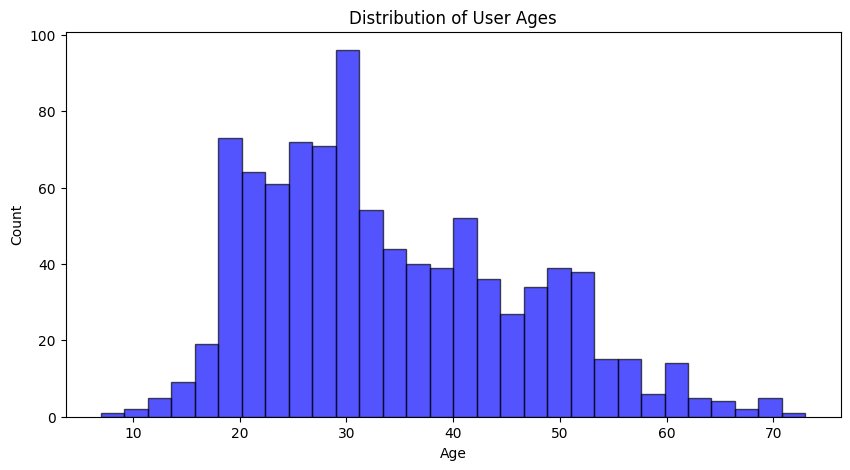

In [20]:
plt.figure(figsize=(10, 5))
plt.hist(users_df['age'], bins=30, color='blue', alpha=0.67, edgecolor='black')
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Gender Distribution

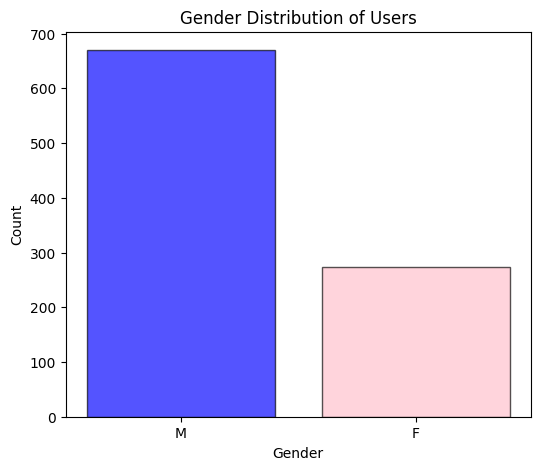

In [21]:
plt.figure(figsize=(6, 5))
gender_count = users_df['gender'].value_counts()
plt.bar(gender_count.index, gender_count.values, color=['blue', 'pink'], alpha=0.67, edgecolor='black')
plt.title('Gender Distribution of Users')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Occupation Distribution

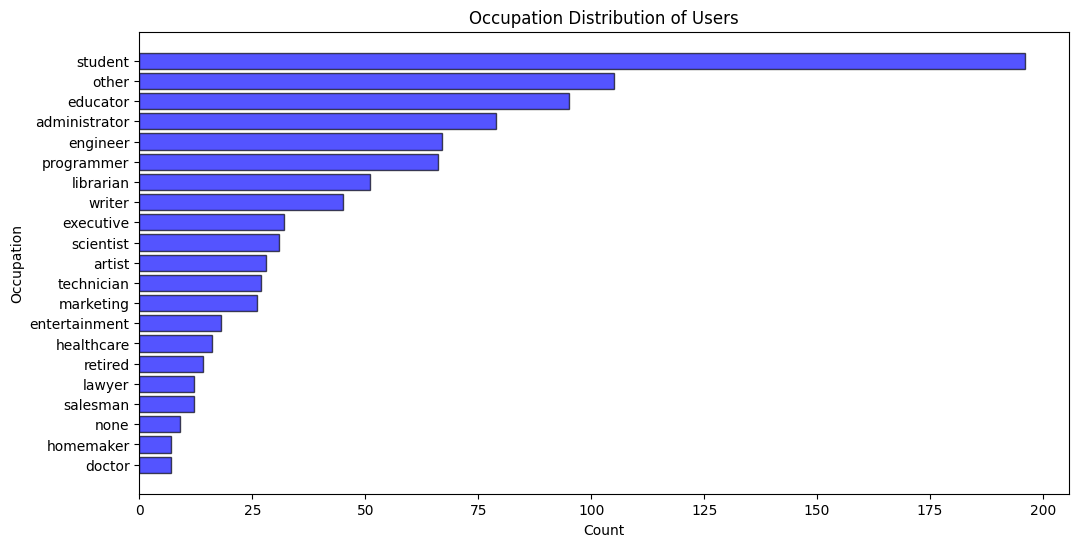

In [22]:
plt.figure(figsize=(12, 6))
occupation_count = users_df['occupation'].value_counts().sort_values(ascending=True)
plt.barh(occupation_count.index, occupation_count.values, color='blue', alpha=0.67, edgecolor='black')
plt.title('Occupation Distribution of Users')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()

### Popular Movie Genres

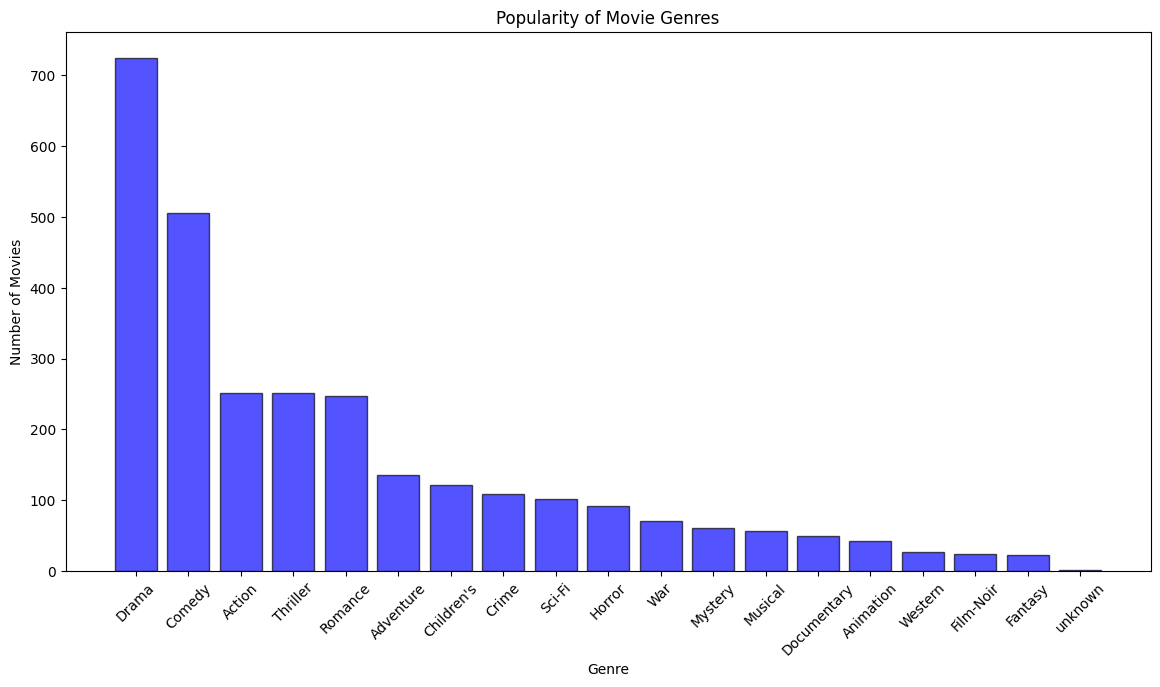

In [23]:
genre_columns = movie_columns[5:]
genre_totals = movies_df[genre_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 7))
plt.bar(genre_totals.index, genre_totals.values, color='blue', alpha=0.67, edgecolor='black')
plt.title('Popularity of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

## Summary of the Analysis

# Implementation of Matrix Factorization


Steps:
1. Initialize the latent factor matrices P (for users) and Q (for items) randomly, as well as the biases for users and items.

2. Iterate over the specified number of epochs, updating P, Q, user biases, and item biases for each non-zero rating.

3. Use the bold driver method to adjust the learning rate dynamically, depending on the current loss.

4. Track and record the training loss after each epoch, and stop if the improvement falls below the tolerance threshold.

In [38]:
class MatrixFactorizationSGD:
    def __init__(self, num_factors=10, learning_rate=0.01, max_epochs=100, tolerance=1e-6):
        self.num_factors = num_factors
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.tolerance = tolerance
        self.P = None
        self.Q = None
        self.user_bias = None
        self.item_bias = None
        self.global_bias = None

    def fit(self, ratings):
        """
        Fits the matrix factorization model to the given ratings matrix using Stochastic Gradient Descent (SGD).
        :param ratings: A matrix of user-item ratings where rows represent users and columns represent items.
        :return: A list containing the loss history during the training process.
        """
        n, m = ratings.shape

        self.P = np.random.normal(scale=0.1, size=(n, self.num_factors))
        self.Q = np.random.normal(scale=0.1, size=(m, self.num_factors))
        self.user_bias = np.zeros(n)
        self.item_bias = np.zeros(m)
        self.global_bias = np.mean(ratings[ratings != 0])

        loss_history = []

        for epoch in range(1, self.max_epochs + 1):
            prev_loss = self._loss(ratings)

            for u in range(n):
                for i in range(m):
                    if ratings[u][i] > 0:
                        err_ui = ratings[u, i] - self.predict(u, i)

                        self.user_bias[u] += self.learning_rate * err_ui
                        self.item_bias[i] += self.learning_rate * err_ui

                        self.P[u, :] += self.learning_rate * err_ui * self.Q[u, :]
                        self.Q[i, :] += self.learning_rate * err_ui * self.P[u, :]

            current_loss = self._loss(ratings)
            loss_history.append(current_loss)
            loss_diff = abs(current_loss - prev_loss)

            # Bold Driver
            if current_loss < prev_loss:
                self.learning_rate *= 1.05
            else:
                self.learning_rate *= 0.5

            if loss_diff < self.tolerance:
                print(f'Converged at epoch {epoch}.')
                break

        else:
            print(f'WARNING: Did not converge in {self.max_epochs} epochs.')

        return loss_history

    def predict(self, user, item):
        """
        Predicts the ratings for a user for a given item.
        :param user: User index.
        :param item: Item index.
        :return: Predicted rating.
        """
        if self.P is None or self.Q is None or self.user_bias is None or self.item_bias is None or self.global_bias is None:
            raise ValueError('Call fit before predicting!')

        return self.global_bias + self.user_bias[user] + self.item_bias[item] + self.P[user, :] @ self.Q[item, :].T

    def _loss(self, ratings):
        non_zero_pairs = np.array(ratings.nonzero()).T

        loss = 0
        for u, i in non_zero_pairs:
            loss += (ratings[u, i] - self.predict(u, i)) ** 2

        return loss / len(non_zero_pairs)

Converged at epoch 74.


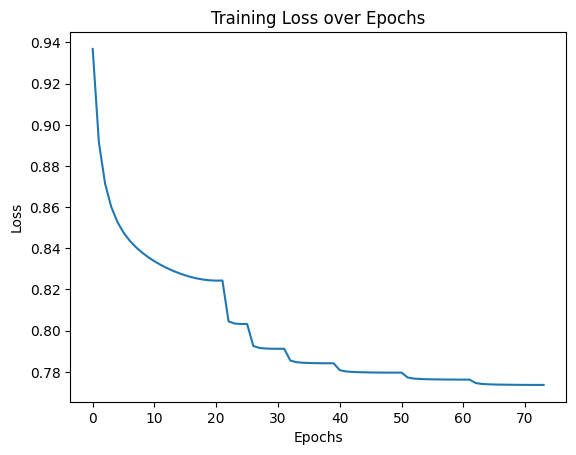

In [40]:
# Create a user-item ratings matrix
n_users = ratings_df['user_id'].nunique()
n_items = ratings_df['movie_id'].max()
ratings_matrix = np.zeros((n_users, n_items))

for row in ratings_df.itertuples():
    ratings_matrix[row.user_id - 1, row.movie_id - 1] = row.rating

# Initialize and fit the matrix factorization model
mf_sgd = MatrixFactorizationSGD(num_factors=10, learning_rate=0.01, max_epochs=100, tolerance=1e-6)
loss_history = mf_sgd.fit(ratings_matrix)

# Plotting the loss over epochs
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

In [ ]:
# TODO: normalize the data.
# TODO: Optimize the hyperparameters, i.e. reg. constant, learning rate and latent dimensions
# TODO: Compute the test RMSE (averaged across 3 folds)

# References
Harper, F. M., & Konstan, J. A. (2015). *The MovieLens Datasets: History and Context*. ACM Transactions on Interactive Intelligent Systems (TiiS), 5(4), Article 19. DOI: [10.1145/2827872](http://dx.doi.org/10.1145/2827872)
